## Exploring Copulas by pissing about in Python
Importing stats and visualisation packages

In [2]:
%matplotlib inline
import seaborn as sns
from scipy import stats

Creating U(0,1) from 10,000 points

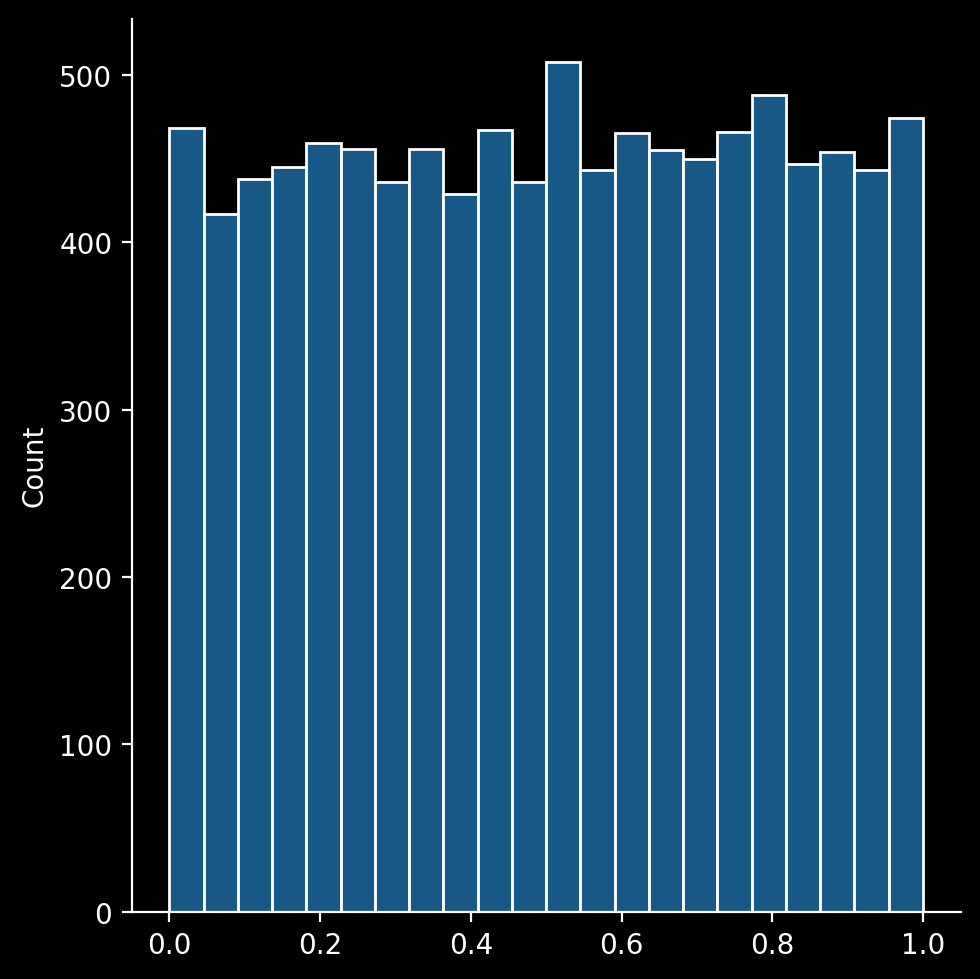

In [3]:
U = stats.uniform(0,1).rvs(10000)
sns.displot(U)

Creating N(0,1) by transforming U

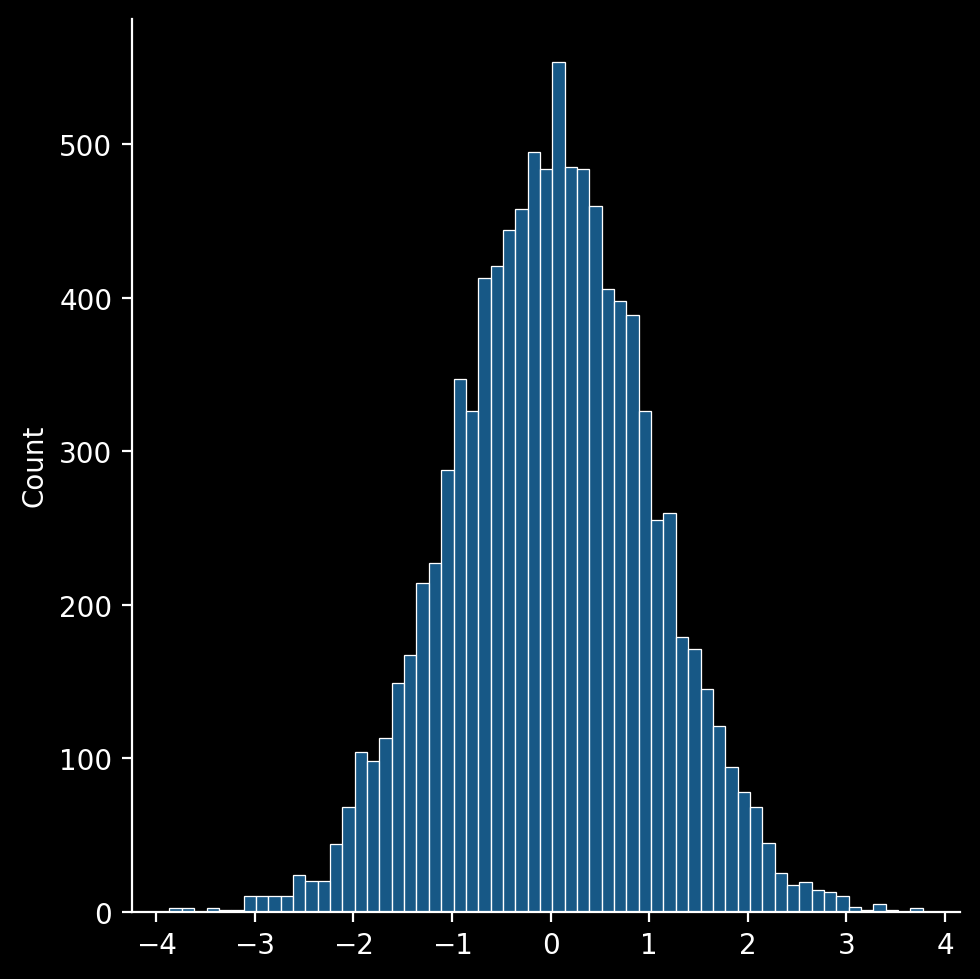

In [4]:
norm = stats.distributions.norm()
N = norm.ppf(U)
U_10 = 10*U
sns.displot(N)

Plotting U against N.

Can think of every point as being defined by its position in U, and its position in N.

The line created by those points is the inverse CDF of N. I believe that transforming a U(0,1) dataset to any distribution and applying this function will result in its inverse CDF. 

But what happens if I make the initial thing U(0,10)? Well the plot for U now extends to 10 of course, but the joint plot only goes to 1 as (presumably) the function was regularised before being transformed into the normal distribution.

However it does seem like the points are now much sparser (based mostly on the normal histogram above). This indicates to me that actually when making the normal dataset, it simply selected all the values in U(0,10) which were less than 1, which would just be U(0,1) but from 1000 points rather than 10,000.

Using this same joint thingo, if I do 2 uniform distributions seperately I get a scatter plot which looks like a 2D uniform distribution, but when 1 UD is just a transformation of the other then the scatter plot is just the equation of the transformation (eg U_10 = 10*U_1)

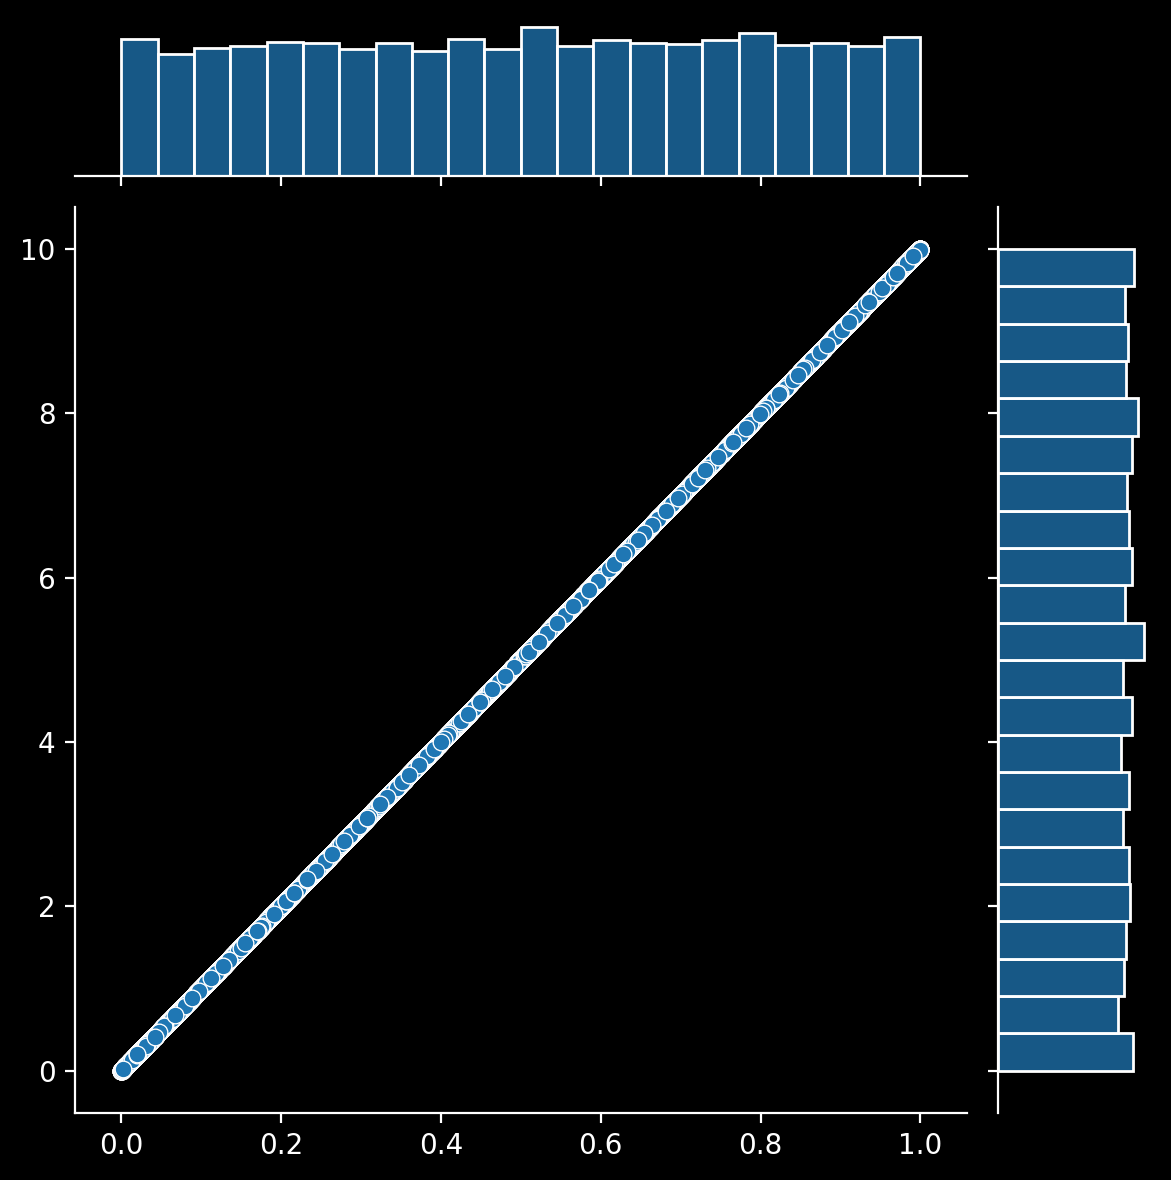

In [5]:
sns.jointplot(x=U, y=U_10)

Beta(10,3) distribution 

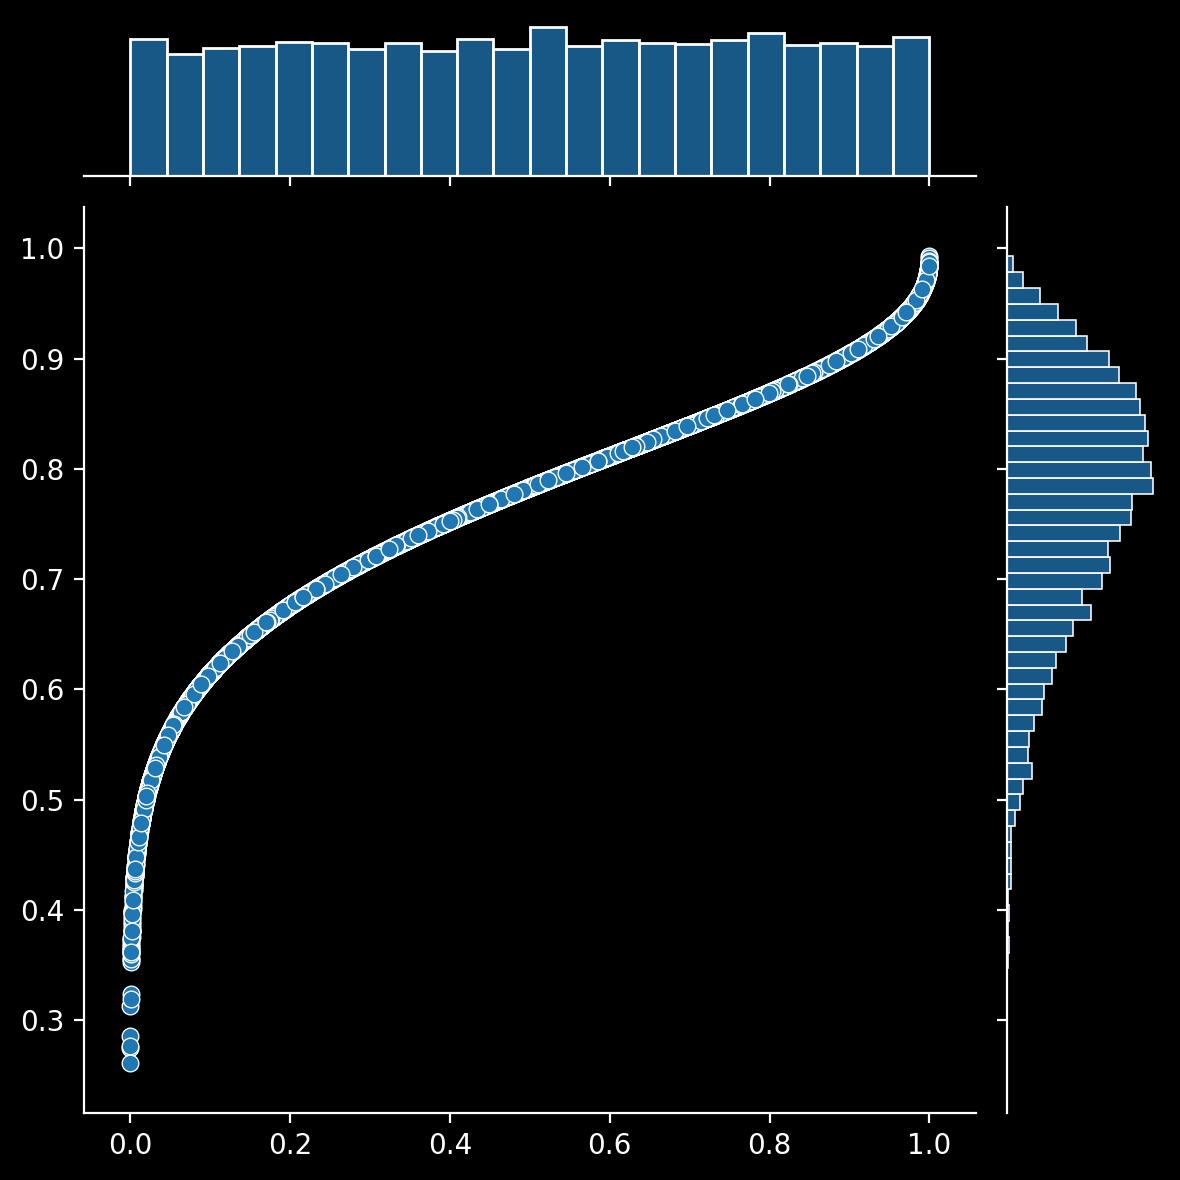

In [6]:
beta = stats.distributions.beta(a=10, b=3)
B = beta.ppf(U)
sns.jointplot(x=U, y=B)

### Going in the opposite direction

Taking the beta distribution I made earlier and transforming it back into U(0,1).

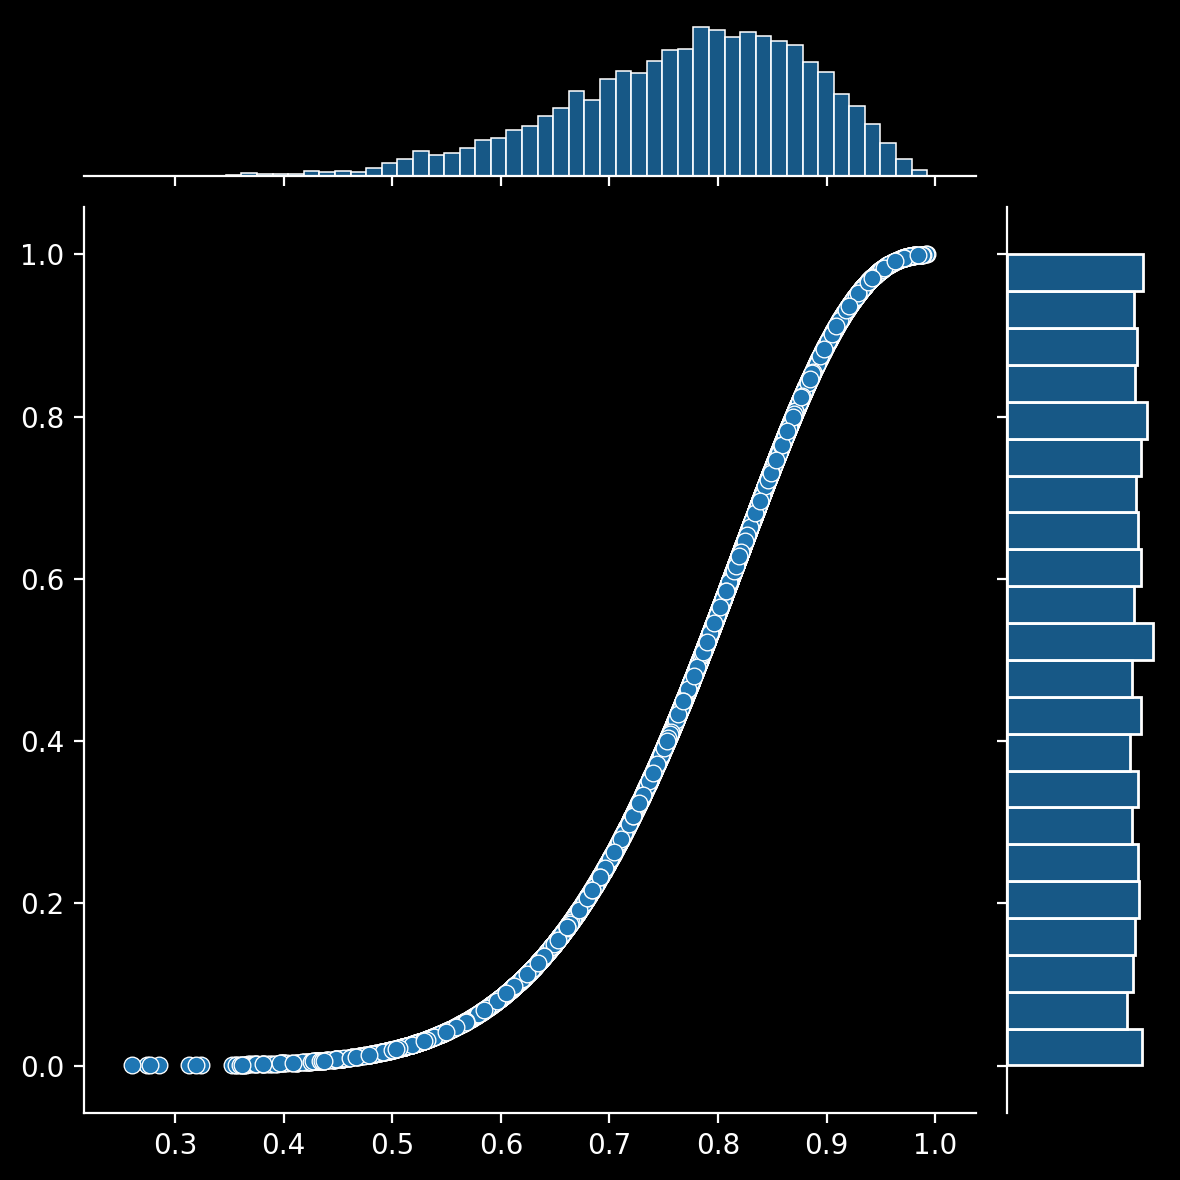

In [7]:
new_U = beta.cdf(B)
sns.jointplot(x=B, y=new_U)

Now we wanna create samples from a multivariate normal with a particular correlation coefficient.


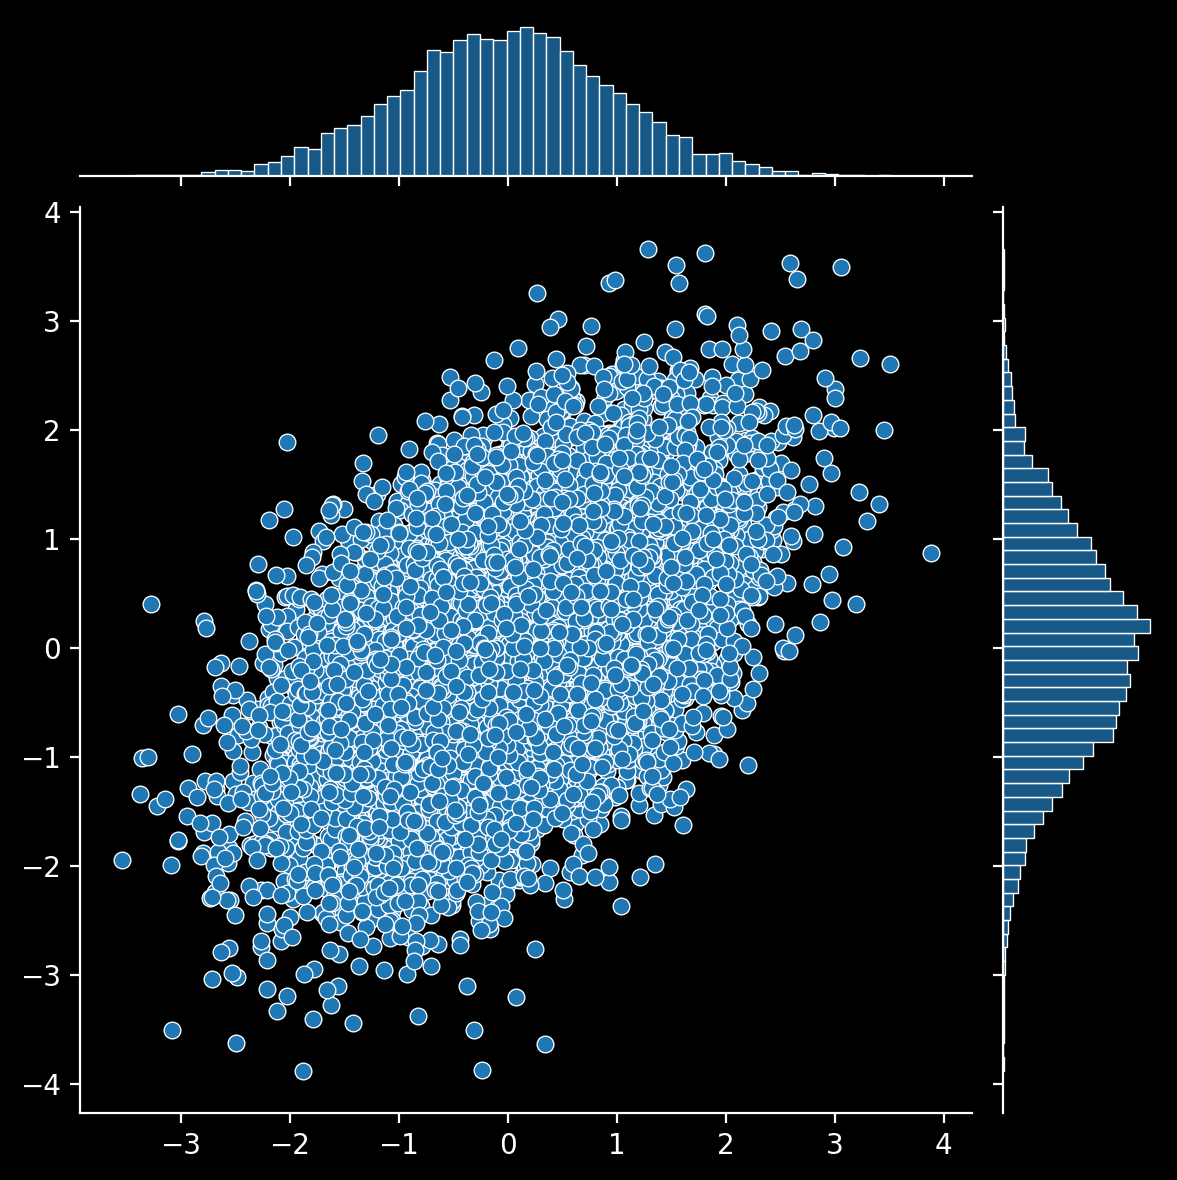

In [8]:
mvnorm = stats.multivariate_normal(mean=[0,0], cov=[[1,0.5],[0.5,1]])
x = mvnorm.rvs(10000)
sns.jointplot(x=x[:,0], y=x[:,1])

Soooo now it wants me to just chuck the multivariate function into the cdf thingo, and expects it to all come out just fine.

I'm a bit skeptical, and also wanna try doing them individually too.

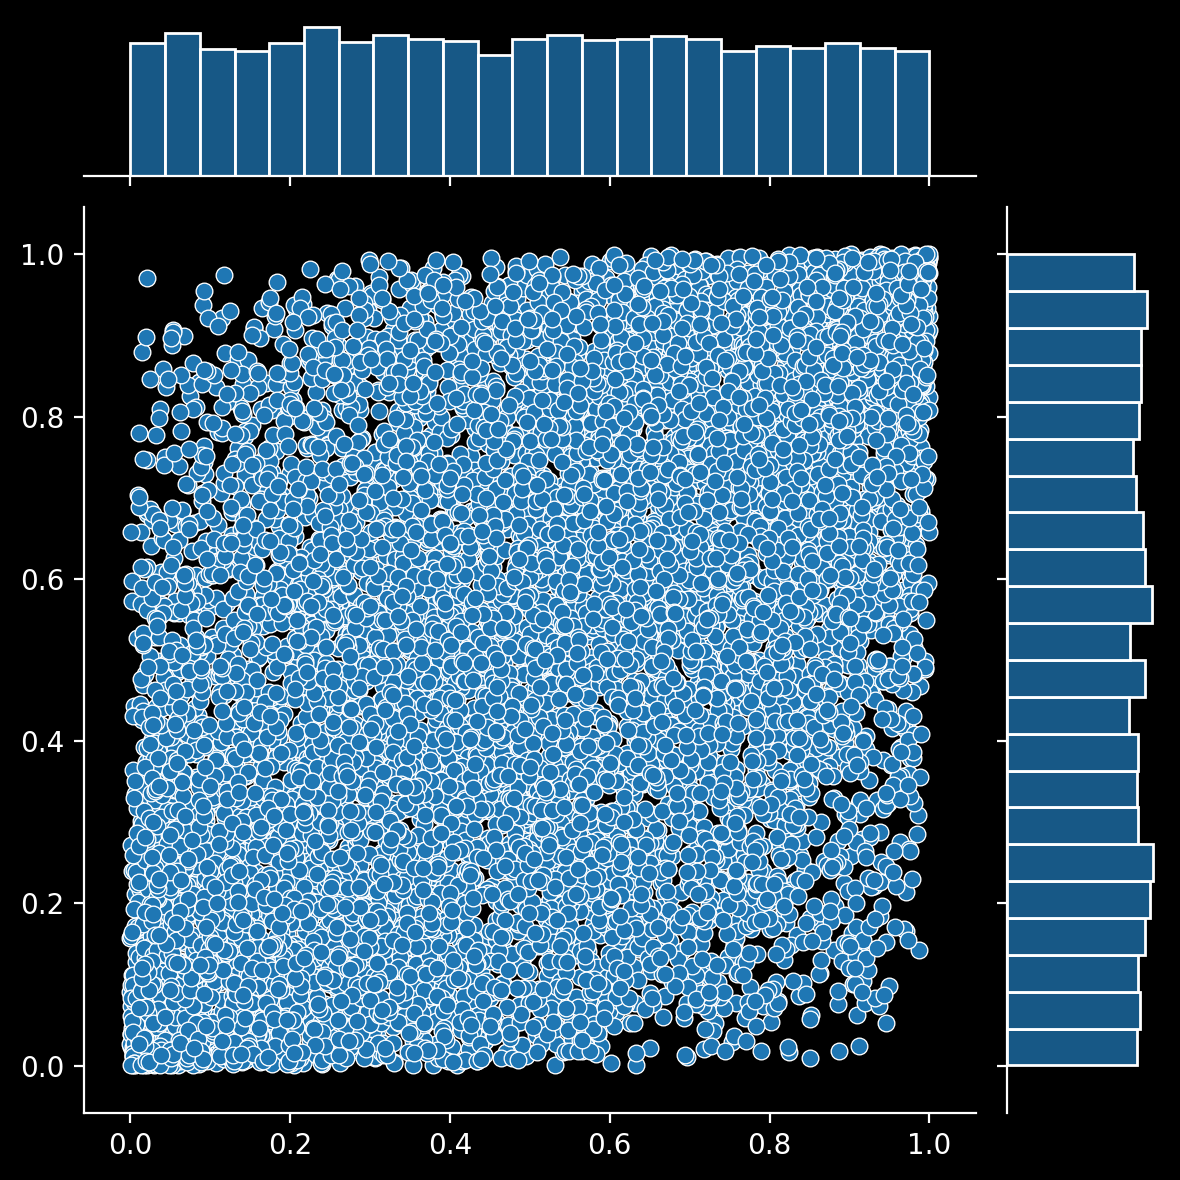

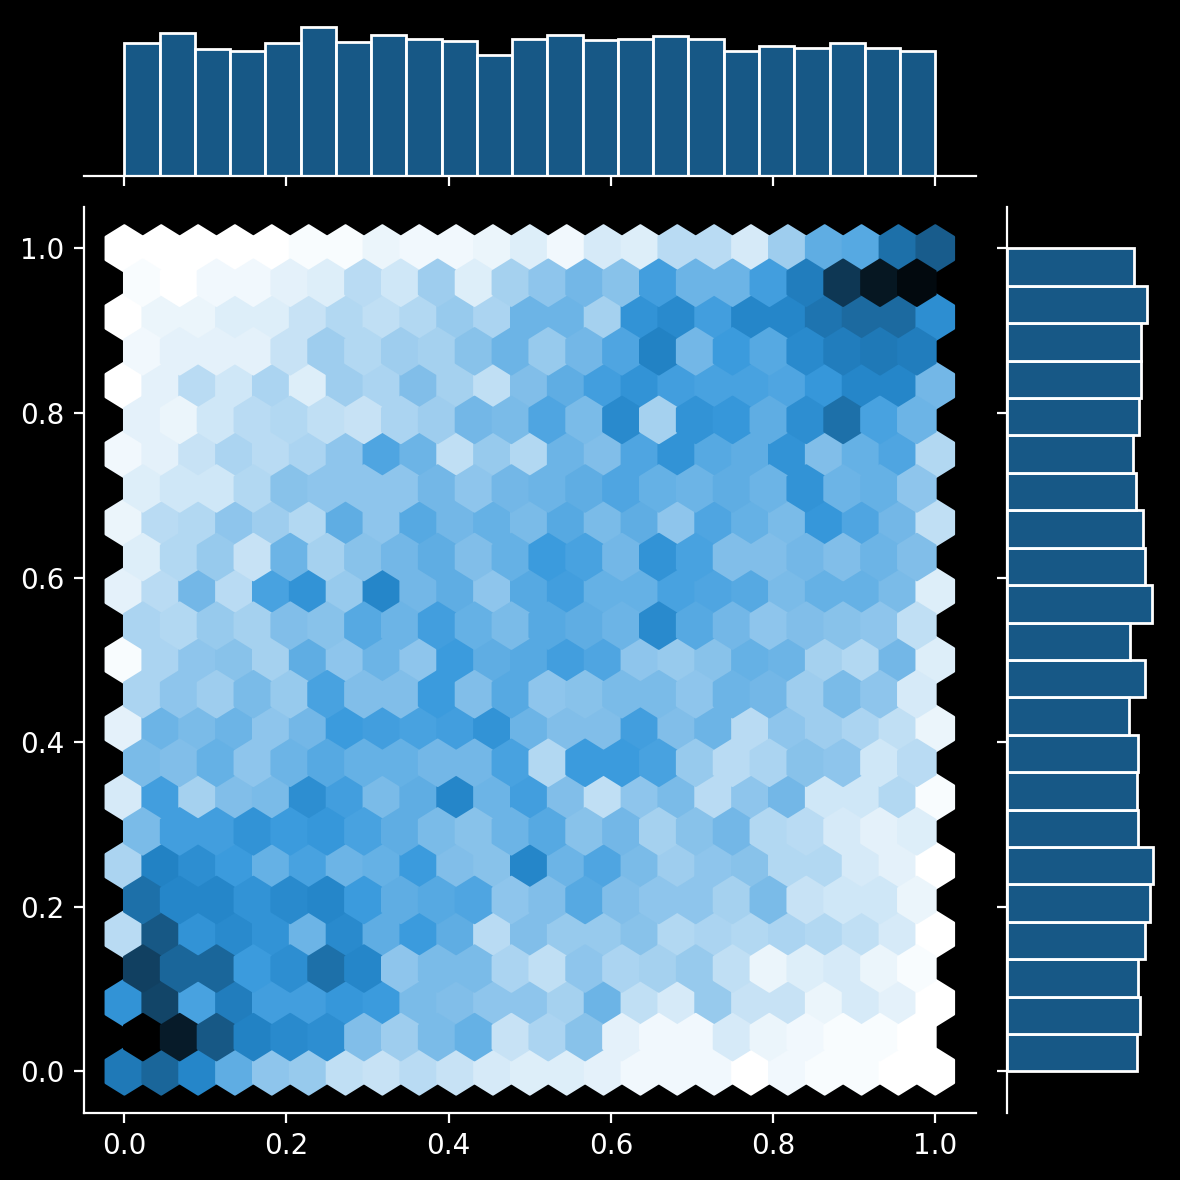

In [9]:
x_x = x[:,0]
x_y = x[:,1]

norm = stats.norm()

x_unif = norm.cdf(x)
x_x_unif = norm.cdf(x_x)
x_y_unif = norm.cdf(x_y)

sns.jointplot(x = x_unif[:,0], y = x_unif[:,1])
sns.jointplot(x = x_x_unif, y = x_y_unif, kind='hex')

Righto so doing them individually seems to give exactly the same result, which means that the function is not too scary and kinda just works as you'd expect (ie splitting up the matrix, then uniformifying each column individually), so that's cool.

So this is the sorta pattern you get with a bivariate joint uniform distibution with correlation (I think).

To check this I'm just gonna do a joint plot with two U(0,1) thingos I generate independently. I'm expecting it to kinda just look like a "2D UD", but we shall see.

/var/mobile/Containers/Data/Application/875079F5-B090-44A1-9507-D8F9CA619F0E/Documents/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


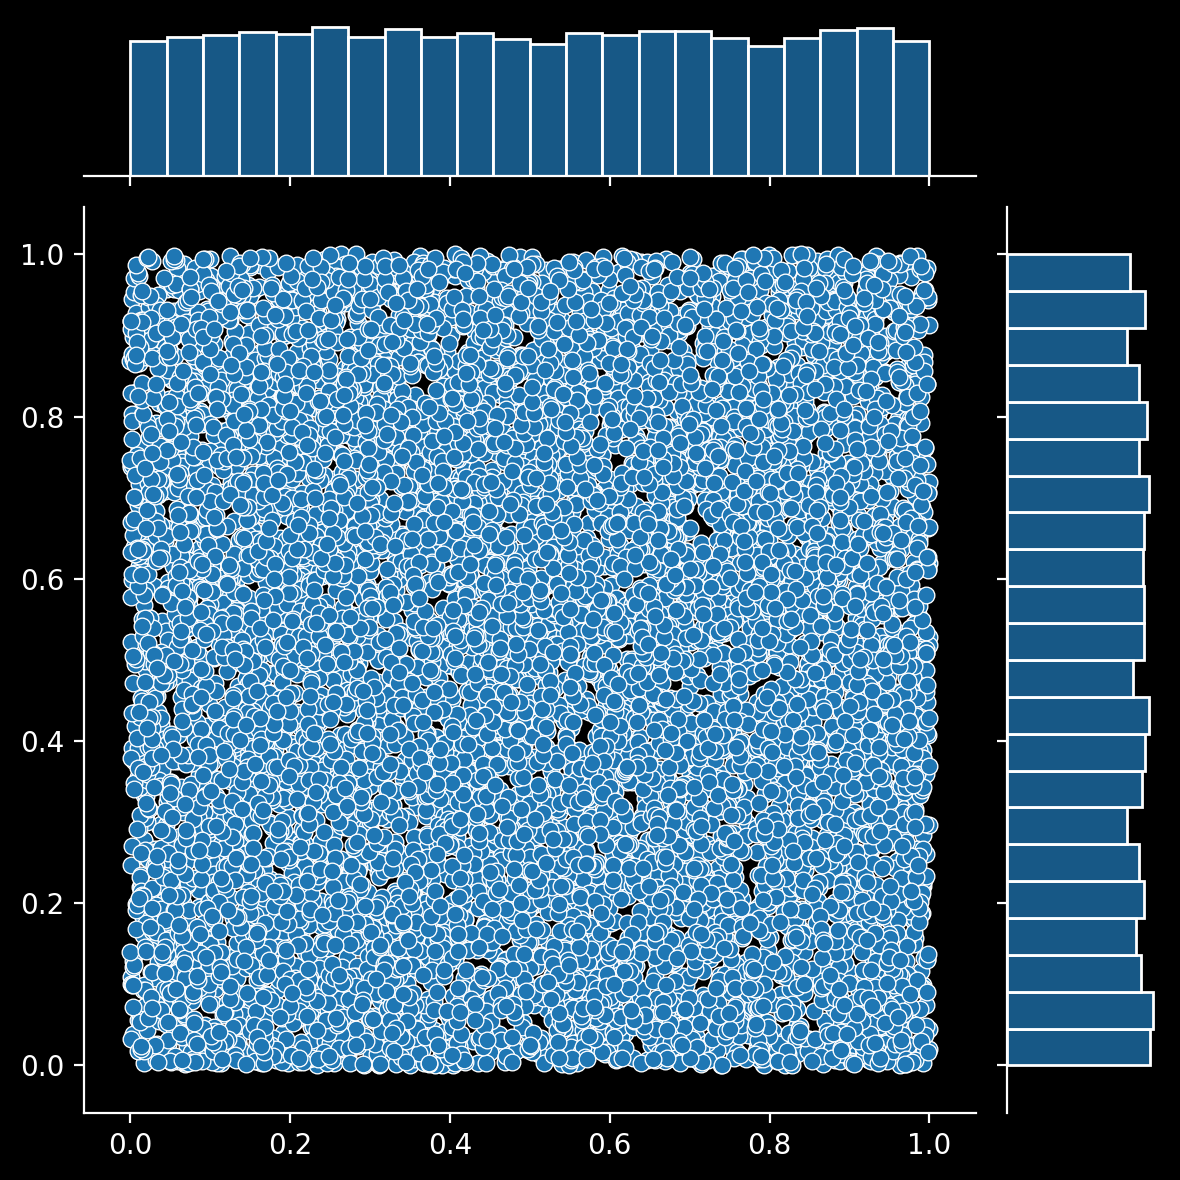

In [10]:
U_x = stats.uniform(0,1).rvs(10000)
U_y = stats.uniform(0,1).rvs(10000)
sns.jointplot(x=U_x, y=U_y)

WOO HOOOOOO ok sick that did exactly what I expected it to, feelsgoodman.jpeg.

So going back a bit, we still have those to *correlated* U(0,1) distributions, x_x_unif and x_y_unif.

Let's make them Gumbel and Beta distributions respectively (for no particular reason, totally not because that's what the tute done did).

/var/mobile/Containers/Data/Application/875079F5-B090-44A1-9507-D8F9CA619F0E/Documents/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


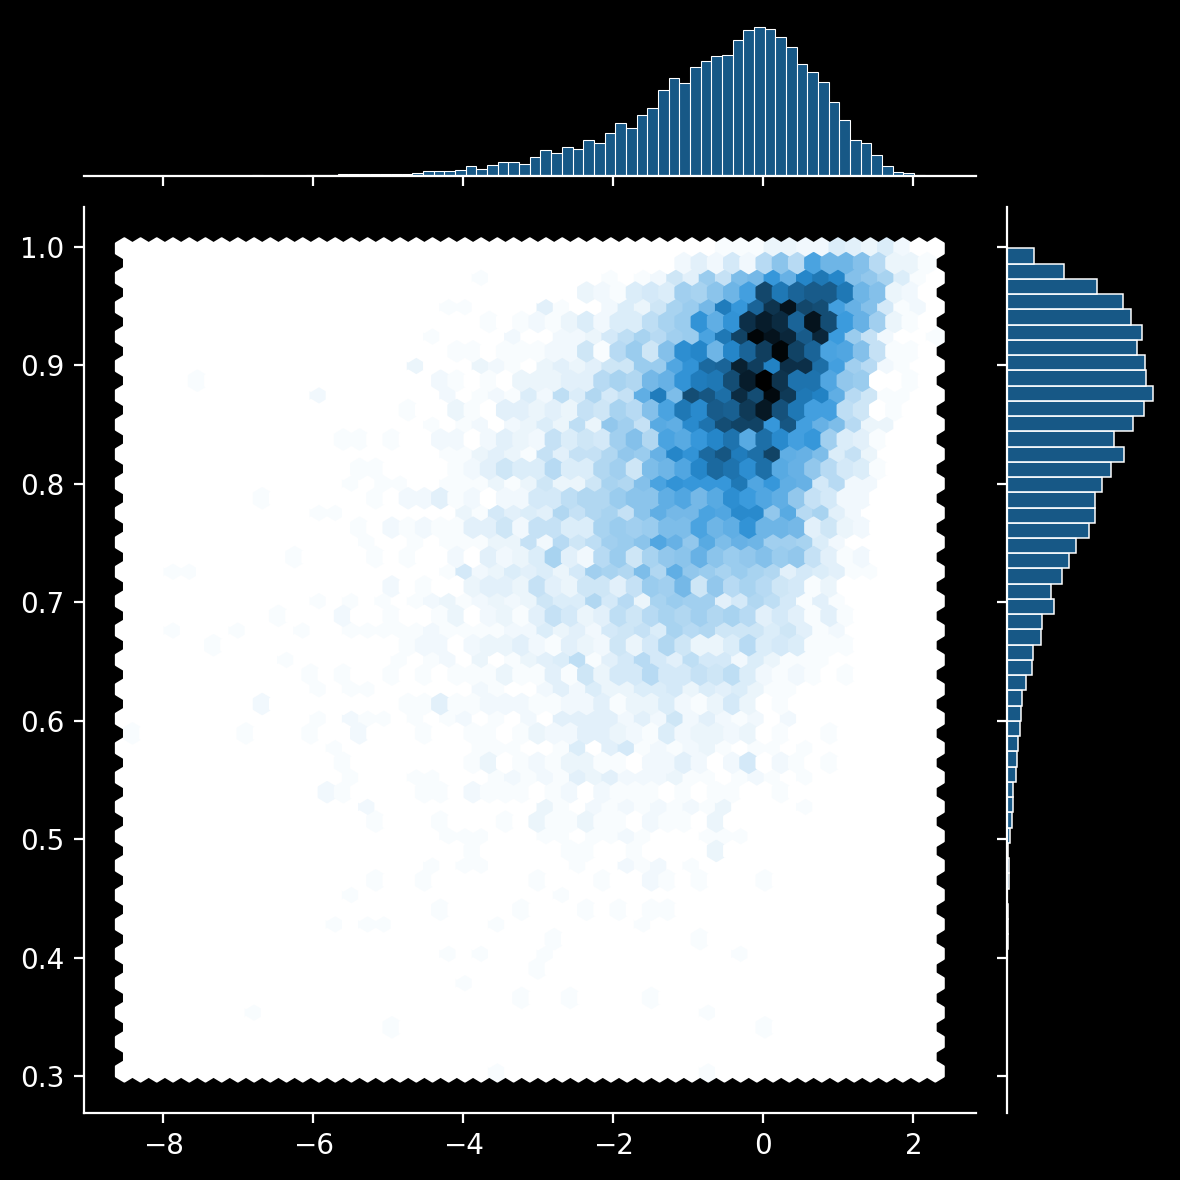

In [11]:
gummy = stats.gumbel_l()
beta = stats.beta(a=10, b=2)

G = gummy.ppf(x_x_unif)
B = beta.ppf(x_y_unif)

sns.jointplot(x=G, y=B, kind='hex')

Alright that is pretty dope. Now I'm just gonna generate those same distributions independently and check that the result looks different. 

I'm guessing it's gonna be more spread out than the one above? We'll see.

/var/mobile/Containers/Data/Application/875079F5-B090-44A1-9507-D8F9CA619F0E/Documents/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


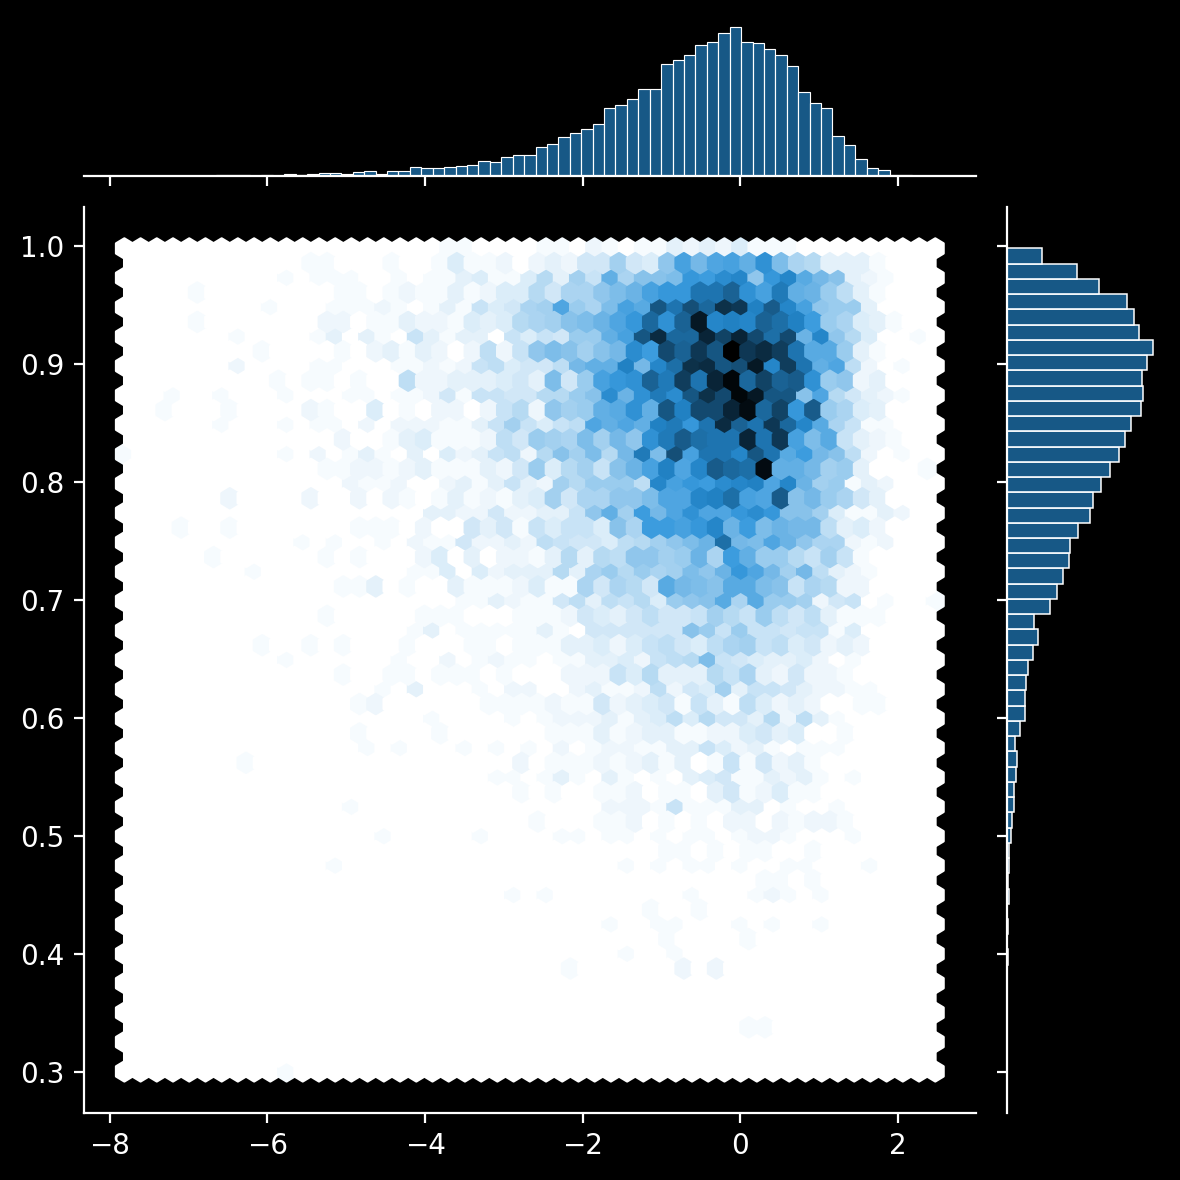

In [12]:
G_i = stats.gumbel_l().rvs(10000)
B_i = stats.beta(a=10,b=2).rvs(10000)

sns.jointplot(x=G_i, y=B_i, kind='hex')

Fuuuuuck yes, just as I expected. Good shit.